In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from calcwf import *
from interpolating_match import *

So far we have been drawing from a uniform distribution between the min/max lines to map from SNR ratio to eccentricity. Believe however this is not completely accurate, and may be a fairly simple distribution with a given eccentricity more likely to correspond to SNR ratios close to the min/max lines than in between. Will investigate this here.

First off will plot histogram of relative vertical position of all grid points between the minimum and maximum lines.

In [2]:
# Load grid data
with open(os.path.join('grid_data', 'dataslot_21', 'all_matches'), 'rb') as fp:
        grid_data_20_30_5 = pickle.load(fp)
grid_data_20_30_5 = find_min_max(grid_data_20_30_5)

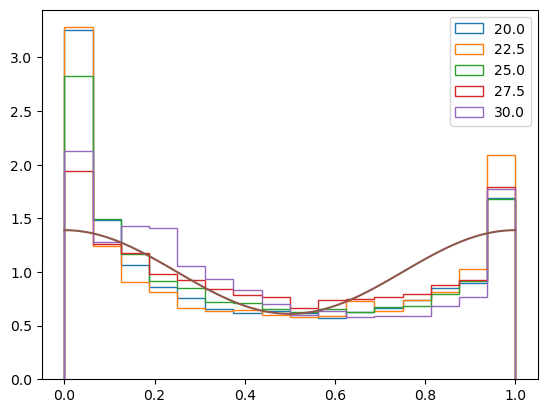

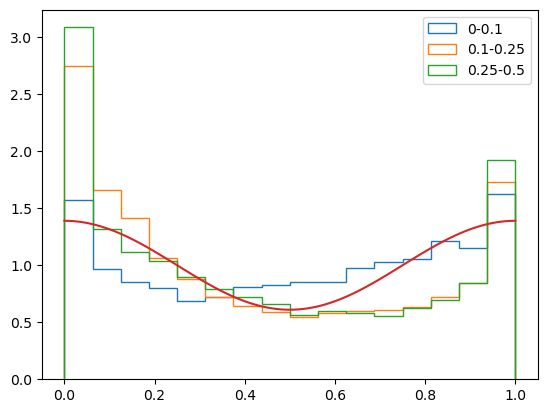

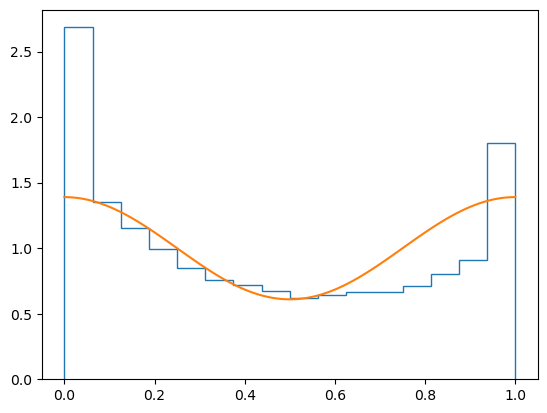

In [112]:
all_v_pos = []
# Plot histogram for each chirp mass
for chirp in grid_data_20_30_5.keys():

    # Calculate relative vertical position of each grid point
    h1_h0_vals = grid_data_20_30_5[chirp]['h1_h0']
    h1_h0_min_vals = np.tile(grid_data_20_30_5[chirp]['h1_h0_min'], (np.shape(h1_h0_vals)[-1], 1)).T
    h1_h0_max_vals = np.tile(grid_data_20_30_5[chirp]['h1_h0_max'], (np.shape(h1_h0_vals)[-1], 1)).T
    v_pos_list = (h1_h0_vals - h1_h0_min_vals)/(h1_h0_max_vals-h1_h0_min_vals)
    all_v_pos.append(v_pos_list)

    # Plot individual histogram for each chirp mass
    plt.hist(v_pos_list.flatten(), bins=int(np.shape(h1_h0_vals)[-1]/2), histtype='step', label=chirp, density=True)
x = np.linspace(0,1,101)
plt.plot(x, np.cos(np.pi*x)**2*0.78+0.61)
plt.legend()
plt.show()

# Plot histogram for different eccentricity ranges
ecc_bins = [0, 40, 100, 201]
labels = ['0-0.1', '0.1-0.25', '0.25-0.5']
all_v_pos = np.array(all_v_pos)
for i in range(len(ecc_bins)-1):
    curr_v_pos = all_v_pos[:,ecc_bins[i]:ecc_bins[i+1]]
    plt.hist(curr_v_pos.flatten(), bins=16, histtype='step', label=labels[i], density=True)
plt.plot(x, np.cos(np.pi*x)**2*0.78+0.61)
plt.legend()
plt.show()

# Plot combined histogram containing all chirp masses
plt.hist(all_v_pos.flatten(), bins=16, histtype='step', density=True)
plt.plot(x, np.cos(np.pi*x)**2*0.78+0.61)

Have plotted here the distrbutions split by chirp mass, eccentricity, and finally all combined. Split by chirp mass distributions look similar enough to combine. For eccentricty, below 0.1 may be different however uncertainty is very small here anyway so will also combine and treat as universal distribution.

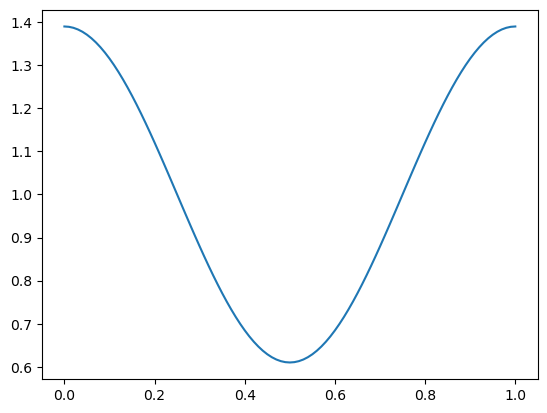

In [109]:
x = np.linspace(0,1,101)
plt.plot(x, np.cos(np.pi*x)**2*0.78+0.61)